In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import gradio as gd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [28]:
ice=pd.read_csv('SalesData.csv')

In [29]:
ice.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [30]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [31]:
ice.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [32]:
x=ice.iloc[:,:-1]
y=ice.iloc[:,-1]

In [33]:
x.head()

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498


In [34]:
y.head()

0    534.799028
1    625.190122
2    660.632289
3    487.706960
4    316.240194
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

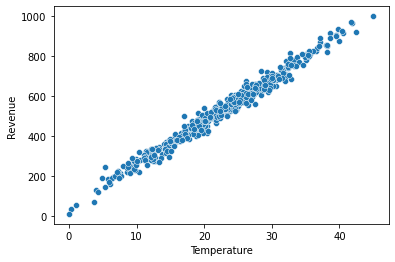

In [35]:
sb.scatterplot(data=ice,x='Temperature',y='Revenue')

<AxesSubplot:xlabel='Revenue', ylabel='count'>

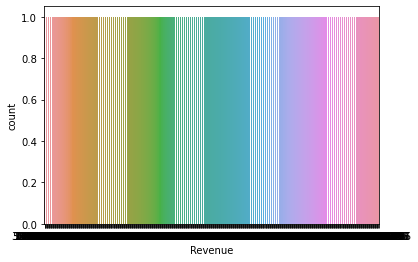

In [36]:
sb.countplot(data=ice,x='Revenue')

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

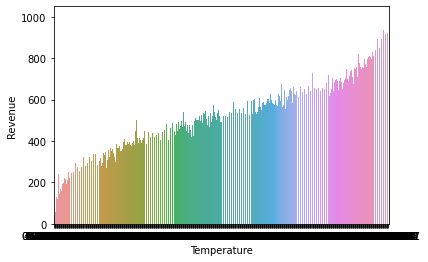

In [37]:
sb.barplot(data=ice,x='Temperature',y='Revenue')

<AxesSubplot:>

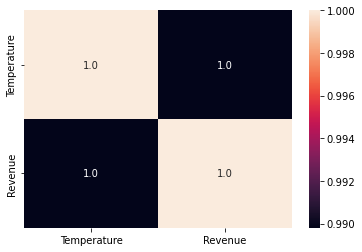

In [38]:
sb.heatmap(ice.corr(),annot=True,fmt="0.1f")

In [39]:
x1,x2,y1,y2=train_test_split(x,y,test_size=0.25,random_state=25)

In [40]:
model=LinearRegression()
model.fit(x1,y1)

LinearRegression()

In [41]:
model.predict(x2)

array([441.76173096, 481.80171267, 725.71396034, 652.44359202,
       455.12148896, 198.63756549, 409.41990322, 681.91965065,
       392.38621347, 476.25272563, 437.3511509 , 575.49244223,
       685.70509428, 308.26096723, 235.90010363, 504.99686955,
       746.7840575 , 337.45447075, 792.95965788, 427.10918418,
       398.78441648, 215.25753916, 449.44608945, 729.02045417,
       570.89883036, 513.80975482, 638.8706894 , 604.78419122,
       860.53166572, 419.4834845 , 156.56371911, 280.82163706,
       768.91721855, 546.69666171, 634.81340788, 611.97464849,
       492.25832321, 209.05863564, 413.99464363, 893.14521141,
       606.2814555 , 569.25957402, 439.35729927, 529.64890514,
       433.31133274, 359.67253465, 509.12536092, 805.82478703,
       695.40308201, 147.05361618, 363.8060796 , 524.58843972,
       422.49318134, 805.53214156, 457.41757964, 605.7902878 ,
       434.90508081, 393.33013087, 306.51425946, 291.41202813,
       389.95510751, 320.09799408, 704.71452479, 395.55

In [42]:
y2.head()

411    443.113603
380    513.804382
38     740.935685
254    632.901914
234    474.832244
Name: Revenue, dtype: float64

In [43]:
model.score(x2,y2)

0.9784424653998212

In [51]:
n=32
new_data=np.array(n).reshape(-1,1)
model.predict(new_data)

C:\Users\bsman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([731.3575773])

In [52]:
def pred(x):
    x=np.array(x).reshape(-1,1)
    result=model.predict(x)
    return float(result) 
pred(32)

C:\Users\bsman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


731.3575773017828

In [53]:
app = gd.Interface(fn=pred, inputs=[gd.Number(label="Temperature")],
                   outputs="label",allow_flagging="manual",flagging_dir='flagged',
                   title="Ice Cream Sales Prediction",theme=gd.themes.Soft(),
                   css=".gradio-container {background-color: powderblue}")
app.launch(show_error=True,share=True)   

Running on local URL:  http://127.0.0.1:7864

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app


C:\Users\bsman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\bsman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\bsman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
